In [1]:
import importlib
import header
importlib.reload(header)
from header import *

[1]
>1, train: 1.000, test: 0.997


NameError: name 'ply' is not defined

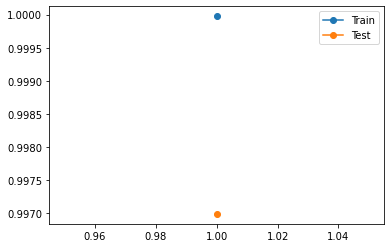

In [3]:
dataset = pd.read_csv('./datasets/ISCX_Botnet.csv')
# selection of all columns except label class with label = 0
X = dataset.iloc[:, :-1].values
# selection of only label class with label = 1
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 2)]
print(values)
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = KNeighborsClassifier(n_neighbors=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
ply.show()